### Load libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [32]:
plt.figure().set_figheight(4)
plt.figure().set_figwidth(4)

<Figure size 640x400 with 0 Axes>

<Figure size 400x480 with 0 Axes>

### Load Dataset

In [33]:
from sklearn import datasets

x, y = datasets.make_regression(n_samples=500, n_features=1, noise=15, random_state=4)

df = pd.DataFrame({'X': x.flatten(), 'Y': y.flatten()})

df.head()

,X,Y
0,-2.436709,-179.206940
1,0.954699,42.267586
2,0.533653,66.115128
3,-0.019636,6.606327
4,0.775468,53.447419


In [34]:
df.shape

(500, 2)

### Visualize Dataset

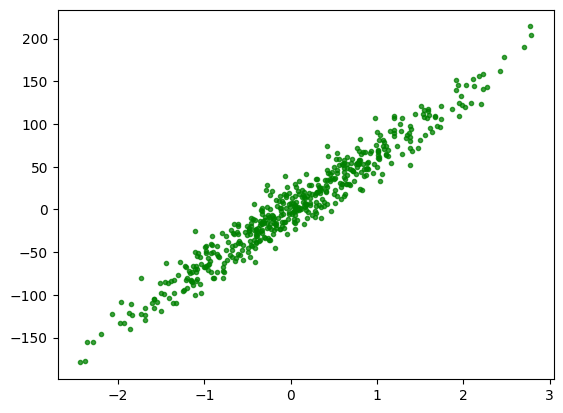

<Figure size 200x1000 with 0 Axes>

In [35]:
plt.scatter(x, y, c='g', marker='.',alpha=0.75)
plt.show()

### Load sklearn's tools

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Split the dataset into training and test

In [37]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(df['X'], df['Y'], test_size=0.2)

### Train the sklearn LR model

In [38]:
model = LinearRegression()
model.fit(X_TRAIN.values.reshape(-1, 1), Y_TRAIN.values.reshape(-1, 1))

LinearRegression()

### Build Linear Regression from scratch

Default Parameters

In [39]:
w = 0 # Slope
b = 0 # Intercept
a = 0.5 # Learning Rate

Define the Model from Scratch

In [40]:
class LinearRegressionScratch:

    # Parameters
    w = 0
    b = 0

    def __init__(self, x: pd.Series, y: pd.Series, a=0.1):
        self.x = x
        self.y = y
        self.a = a
    
    # d/dw J(w, b)
    def __dJw(self, w: float, b: float):
        sum = 0
        for i, xi in self.x.items():
            sum += ((self.w*xi + b)- self.y[i]) * xi

        return sum / (df.shape[0])
    
    # d/db J(w, b)
    def __dJb(self, w: float, b: float):
        sum = 0
        for i, xi in self.x.items():
            sum += (self.w*xi + b) - self.y[i]

        return sum / (df.shape[0])

    # Train the model with the given dataset
    def fit(self):

        w_values = np.array([])
        b_values = np.array([])

        for i in np.arange(50):
            tmp_w = self.w - (a * self.__dJw(self.w, self.b))
            tmp_b = self.b - (a * self.__dJb(self.w, self.b))
            self.w = tmp_w
            self.b = tmp_b

            w_values = np.insert(w_values, w_values.shape[0], self.w)
            b_values = np.insert(b_values, b_values.shape[0], self.b)

            if i % 2 == 0:
                clear_output(wait=True)
                plt.plot(w_values, label='w', c='orange')
                plt.plot(b_values, label='b', c='green')
                plt.legend()
                plt.show()
    
    def predict(self, x: np.ndarray):
        return self.w * x + self.b

Train Scratch Linear Regression and visualize the parameter w and b while fitting

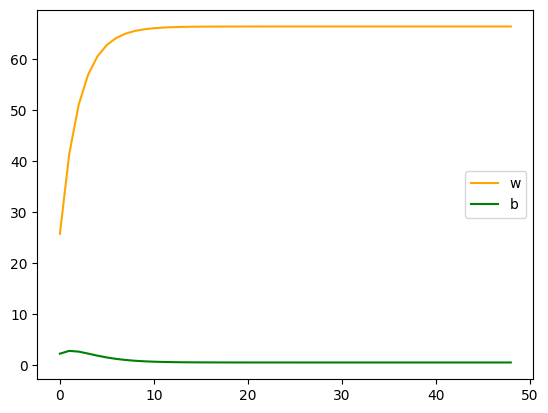

In [41]:
scratch_model = LinearRegressionScratch(X_TRAIN, Y_TRAIN,a=0.001)
scratch_model.fit()

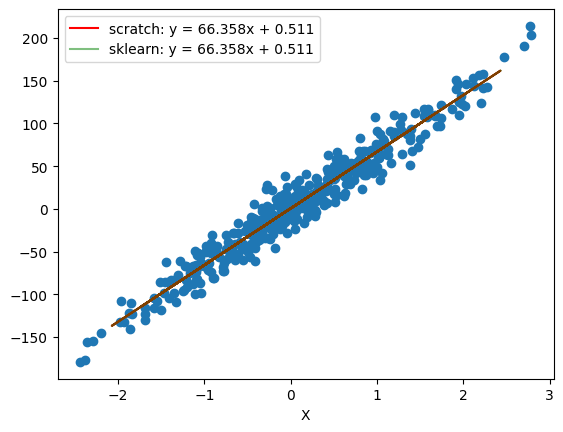

In [42]:
# Plot the Scratch LR and SKLearn LR
plt.scatter(X_TRAIN, Y_TRAIN)
plt.plot(X_TEST, scratch_model.predict(X_TEST.values), label=f'scratch: y = {round(scratch_model.w, 3)}x + {round(scratch_model.b, 3)}', c='red')
plt.plot(X_TEST, model.predict(X_TEST.values.reshape(-1, 1)), label=f'sklearn: y = {round(model.coef_[0, 0], 3)}x + {round(model.intercept_[0], 3)}',  c='green', alpha=0.5)
plt.xlabel('X')
plt.legend()
plt.show()